In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import math
import matplotlib.pyplot as plt

## *Задача 1* 


Напишите функцию, которая вычисляет локализацию всех собственных значений данной матрицы с помощью кругов Гершгорина. 

Для этого используем теорему Гершгорина:

 все собственные значения матрицы $A$ лежат в объединении кругов $S_{1}, S_{2}, \ldots, S_{n}$, где
$$
S_{i}=\left\{z \in C:\left|z-a_{i i}\right| \leq r_{i}\right\}, \quad r_{i}=\sum_{j=1}^{n}\left|a_{i j}\right|-\text { сумма модулей внедиагональных }
$$
элементов $\textrmі$ -ой строки матрицы $A$; если $\mathrm{k}$ кругов образуют замкнутую область, изолированную от других кругов, то в этой области находится ровно $\mathrm{k}$ собственных значений с учётом их кратности. 

Функция должна на вход принимать матрицу, на выход давать список кругов Гершгорина, задаваемых двумя числами - центром круга (комплексное число) и радиусом. 

Сделайте также вторую функцию - визуализацию кругов Гершгорина.

Протестировать программу для матрицы 

$A=\left(\begin{array}{ccc}
-2 & 0,5 & 0,5 \\
-0,5 & -3,5 & 1,5 \\
0,8 & -0,5 & 0,5
\end{array}\right) 
$

Ответ должен быть 

\begin{aligned}
&S_{1}=\{z \in C:|z+2| \leq 1\} \\
&S_{2}=\{z \in C:|z+3,5| \leq 2\} \\
&S_{3}=\{z \in C:|z-0,5| \leq 1,3\}
\end{aligned}

In [5]:
def get_gerg_circles(a):
    n = a.shape[0]
    data = [[a[i,i], np.sum(np.abs(a[i, :])) - np.abs(a[i, i])]for i in range(n) ]
    return data

In [12]:
def plot_gerg_circles(a):
    n = a.shape[0]
    data = [[a[i,i], np.sum(np.abs(a[i, :])) - np.abs(a[i, i])]for i in range(n) ]
    
    fig, ax = plt.subplots(1, 1)
    for i in range(n):
        crc = plt.Circle((data[i][0].real, data[i][0].imag), radius=data[i][1], fill=False)
        ax.add_patch(crc)
    ev = np.linalg.eigvals(a)
    plt.scatter(ev.real, ev.imag, color='r', label="Eigenvalues")
    plt.axis('equal')
    plt.legend()
    ax.set_title('Eigenvalues and Gershgorin circles')
    fig.tight_layout()
    
    

In [13]:
d = get_gerg_circles(a)

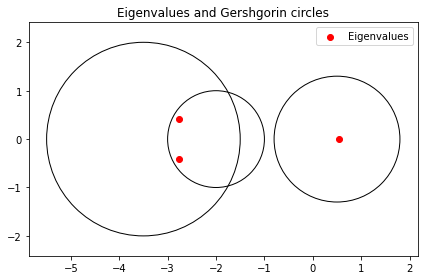

In [15]:
a = np.array([[-2, 0.5, 0.5],[-0.5, -3.5, 1.5],[0.8, -0.5, 0.5]])
plot_gerg_circles(a)

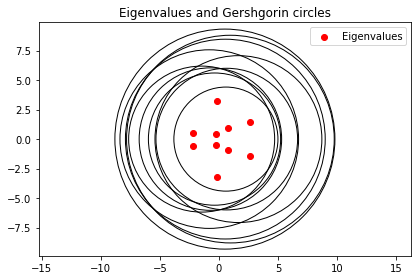

In [24]:
b = np.random.randn(10,10)
plot_gerg_circles(b)

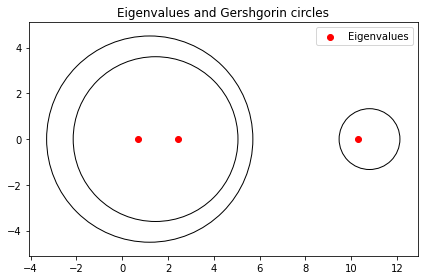

In [3]:
%matplotlib inline
n = 3
fig, ax = plt.subplots(1, 1)
a = [[5, 1, 1], [1, 0, 0.5], [2, 0, 10]]
#a = [[1.0 / (i - j + 0.5) for i in xrange(n)] for j in xrange(n)]
a = np.array(a)
#a = np.diag(np.arange(n))
a = a + 2 * np.random.randn(n, n)
#u = np.random.randn(n, n)
#a = np.linalg.inv(u).dot(a).dot(u)
xg = np.diag(a).real
yg = np.diag(a).imag
rg = np.zeros(n)
ev = np.linalg.eigvals(a)
for i in range(n):
    rg[i] = np.sum(np.abs(a[i, :])) - np.abs(a[i, i])
    crc = plt.Circle((xg[i], yg[i]), radius=rg[i], fill=False)
    ax.add_patch(crc)
plt.scatter(ev.real, ev.imag, color='r', label="Eigenvalues")
plt.axis('equal')
plt.legend()
ax.set_title('Eigenvalues and Gershgorin circles')
fig.tight_layout()

Замечание: Существуют более сложные фигуры, под названием овалы Cassini, которые содержат спектр


$$
M_{i j}=\left\{z \in \mathbb{C}:\left|a_{i i}-z\right| \cdot\left|a_{j j}-z\right| \leq r_{i} r_{j}\right\}, \quad r_{i}=\sum_{l \neq i}\left|a_{i l}\right|
$$  

https://en.wikipedia.org/wiki/Cassini_oval  

# Задача 2


Обычно вычисление собственных значений и собственных векторов необходимо для изучения
- вибраций в механических структурах
- снижения сложности моделей сложных систем 

Более половины вычислительных мощностей в мире тратится на решение задач такого типа для задач.

Одна из самых известных задач о вычислении собственных векторов - задача о ранжировании $n$ веб-страниц (Google PageRank). Подход, который вам нужно будет реализовать в этой задаче, был одним из главных в работе Google на раннем этапе.

Всё, что мы собираемся использовать - структуру взаимных ссылок между страницами. PageRank определяется рекурсивно: важность $i$-й страницы определяется как среднее значение важностей всех страниц, которые ссылаются на $i$-ю. Обозначим важность $i$-й страницы $p_{i}$, тогда это определение может быть записано в виде линейной системы:
$$
p_{i}=\sum_{j} \frac{p_{j}}{L(j)} l_{i j}
$$
где $l_{i j}=1$ если $j$-я страница ссылается на $i$-ю (в противном случае $\left.l_{i j}=0\right)$, а $L(j)-$ количество исходящих ссылок со страницы $j$. Система может быть переписана в виде задачи на собственное значение:
$$
p=G p, \quad G_{i j}=\frac{l_{i j}}{L(j)}
$$
Если в графе есть 'подвешенные' узлы (все элементы какого-то столбца равны нулю), то весь столбед заполняется числом $1 / n$. Наконец, вводится параметр $0<\beta<1$ так что матрица $G$ заменяется на
$$
G \rightarrow \beta G+\frac{1-\beta}{n} e e^{T}
$$
где $e$ - вектор, состоящий из единиц. Обратите внимание, что задача свелась к нахождению собственного вектора $p$ матрицы $G$, отвечающего собственному значению $1 .$ Можно показать [*], что 1 - максимально возможное собственное значение матрицы $G .$
- Придумайте самостоятельно небольшой граф связности ( 10 узлов), постройте соответствуюшие матрицы $l$ и $G$ и найдите численно собственный вектор, отвечающий PageRank.



# Задача 3

- Скачайте файл, в котором представлен ориентированный граф, узлы которого составляют страницы stanford.edu, а направленные рёбра - ссылки между ними (граф задан матрицей смежности $l$ ). Распакуйте архив и загрузите его:
- Найдите PageRank для матрицы из предыдущего пункта. Для этого реализуйте степенную итерацию для нахождения собственного вектора, отвечающего максимальному собственному значению $G .$ Возьмите $\beta=0.8$
- Итерируйте до тех пор, пока 1-норма изменения вектора-кандидата не станет меньше $10^{-4}$. Сколько итераций понадобилось?
- Какому собственному значению отвечает найденный вектор и у какого узла наибольший РаgеRапk?
- Докажите, что 1 - максимально возможное собственное значение матрицы G.

# Задача 4

Характеристическое уравнение можно использовать для вычисления собственных значений, что приводит нас к наивному алгоритму:
$$
p(\lambda)=\operatorname{det}(A-\lambda I)
$$
1. Вычислить коэффициенты многочлена
2. Найти его корни
Это хорошая идея?
Посмотрим на небольшой пример 

Text(0, 0.5, 'Imaginary part')

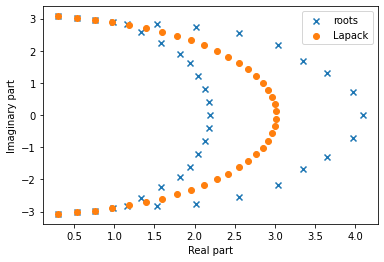

In [6]:
import numpy as np
n = 40
a = [[1.0 / (i - j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)
ev = np.linalg.eigvals(a)
#There is a special numpy function for chacteristic polynomial
cf = np.poly(a)
ev_roots = np.roots(cf)
#print('Coefficients of the polynomial:', cf)
#print('Polynomial roots:', ev_roots)
plt.scatter(ev_roots.real, ev_roots.imag, marker='x', label='roots')
b = a + 0 * np.random.randn(n, n)
ev_b = np.linalg.eigvals(b)
plt.scatter(ev_b.real, ev_b.imag, marker='o', label='Lapack')
#plt.scatter(ev_roots.real, ev_roots.imag, marker='o', label='Brute force')
plt.legend(loc='best')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')

Мораль:
- Не делайте так, если только у вас нет серьёзной причины
- Поиск корней полинома - очень плохо обусловленная задача (задача может быть обусловлена не так плохо, но с использованием другого базиса в пространстве многочленов). Заметим, что матрицей Грама для мономов
$$
h_{i j}=\int_{0}^{1} x^{i} x^{j} d x=\frac{1}{i+j+1}
$$
является матрица Гильберта, у которой сингулярные числа экспоненциально убывают. Таким образом, мономы почти линейно зависимы.

### Задание. 

Напишите программу для нахождения минимального по модулю собственного значения и соответствующего собственного вектора симметричной матрицы при использовании обратных итераций. С её помощью решите задачу для 
- матрицы Гильберта
- матрицы Лемера
- матрицы Паскаля 
- для симметричной трёхдиагональной матрицы, где на главной диагонали стоят 2, а на боковых диагоналях -1.

Напишите на основе этой программы функцию, которая ищет ближайшее к заданному числу собственное значение. 

Для перечисленных матриц вывести ответ для n = 2, 3, ... 10.

Матрицей Лемера называют матрицу, у которой элементы равны:

$a_{i j}=\frac{\min (i, j)}{\max (i, j)} $ (нумерация от 1)

Матрицей Паскаля называют матрицу, у которой элементы равны:

$S_{i j}=\left(\begin{array}{l}
n \\
r
\end{array}\right)=\frac{n !}{r !(n-r) !}, \quad n=i+j, \quad r=i$  (нумерация от 0) 

Примечание. Для некоторых матриц можно использовать также выражение обратной матрицы в явном виде.

 Матрица, обратная к матрице Гильберта, может быть выражена в явном виде через биномиальные коэффициенты:

$$
\left(H^{-1}\right)_{i j}=(-1)^{i+j}(i+j-1)\left(\begin{array}{c}
n+i-1 \\
n-j
\end{array}\right)\left(\begin{array}{c}
n+j-1 \\
n-i
\end{array}\right)\left(\begin{array}{c}
i+j-2 \\
i-1
\end{array}\right)^{2}
$$

где $n$ - порядок матрицы. Таким образом, элементы обратной матрицы $H^{-1}-$ целые числа.  

In [25]:
def eig_min_revit(A, eps):
    invA = np.linalg.inv(A)
    
    X = np.random.random(A.shape[0])
    X0 = np.ones(A.shape[0])
    # E = np.eye(M.shape[0])
      
    step = 0
    while np.linalg.norm(X - X0) > eps:
        X0 = np.copy(X)
        X = invA @ X
        X /= np.linalg.norm(X)
                
        step += 1
     
    lambd = np.dot(invA@X, X)/np.dot(X, X)
    lambd = 1/lambd
    return lambd, step

In [61]:
def eig_closest_revit(A, lambd0, eps):
    n = A.shape[0]
    E = np.eye(n)
    A = A - lambd0 * E
    lambd, step = eig_min_revit(A, eps)
    lambd += lambd0
    return lambd, step

In [ ]:
A = np.eye(10) + np.random.randn(10,10)
A = A@A.T

In [ ]:
np.linalg.eigvals(A)

array([32.5624726 , 22.90493669, 17.26836658, 10.99034591,  9.87177948,
        7.47420495,  2.63490586,  1.0249777 ,  0.14778208,  0.04582105])

In [68]:
eig_closest_revit(A, 17, 1e-5)

(17.26836657855386, 5)

Легко убедиться, что метод работает, легко ищет ближайшие к заданному числу собственные значения

Правда, если два собственных значения сильно близки и мы ищем собственное значение между ними, получаем плохую сходимость

In [90]:
n = 10
M_H = np.fromfunction(lambda i, j: 1/(i+j+1), (n, n))
M_L = np.zeros((n,n))
M_P = np.zeros((n,n))

# M_L = np.fromfunction(lambda i, j: min(i+1,j+1)/max(i+1,j+1), (n, n))

for i in range(n):
    for j in range(n):           
        M_L[i, j] = min(i+1,j+1)/max(i+1,j+1)
        M_P[i, j] = math.comb(i+j, i)
        
        
l_H, _ = eig_min_revit(M_H, 1e-3)
l0_H = np.linalg.eigvals(M_H).min()

In [82]:
ll_H = []
ll_P = []
ll_L = []

for n in range(1, 11):
    M_H = np.fromfunction(lambda i, j: 1/(i+j+1), (n, n))
    M_L = np.zeros((n,n))
    M_P = np.zeros((n,n))

    # M_L = np.fromfunction(lambda i, j: min(i+1,j+1)/max(i+1,j+1), (n, n))

    for i in range(n):
        for j in range(n):           
            M_L[i, j] = min(i+1,j+1)/max(i+1,j+1)
            M_P[i, j] = math.comb(i+j, i)

    l_H, _ = eig_min_revit(M_H, 1e-3)
    l_P, _ = eig_min_revit(M_P, 1e-3)
    l_L, _ = eig_min_revit(M_L, 1e-3)
    
    ll_H.append(l_H)
    ll_P.append(l_P)
    ll_L.append(l_L)
    
    print('n = {:}, \t l_H = {:e}, \t l_L = {:e}, \t l_P = {:e}'.format(n, l_H, l_L, l_P))

n = 1, 	 l_H = 1.000000e+00, 	 l_L = 1.000000e+00, 	 l_P = 1.000000e+00
n = 2, 	 l_H = 6.574145e-02, 	 l_L = 5.000000e-01, 	 l_P = 3.819660e-01
n = 3, 	 l_H = 2.687340e-03, 	 l_L = 3.020196e-01, 	 l_P = 1.270167e-01
n = 4, 	 l_H = 9.670230e-05, 	 l_L = 2.077756e-01, 	 l_P = 3.801602e-02
n = 5, 	 l_H = 3.287929e-06, 	 l_L = 1.560196e-01, 	 l_P = 1.083536e-02
n = 6, 	 l_H = 1.082799e-07, 	 l_L = 1.240069e-01, 	 l_P = 3.004390e-03
n = 7, 	 l_H = 3.493899e-09, 	 l_L = 1.024675e-01, 	 l_P = 8.182872e-04
n = 8, 	 l_H = 1.111539e-10, 	 l_L = 8.707307e-02, 	 l_P = 2.200851e-04
n = 9, 	 l_H = 3.499691e-12, 	 l_L = 7.556432e-02, 	 l_P = 5.864293e-05
n = 10, 	 l_H = 1.093293e-13, 	 l_L = 6.665742e-02, 	 l_P = 1.551328e-05


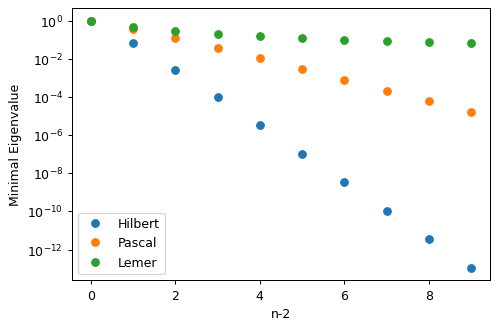

In [89]:
fig, ax = plt.subplots(1, 1, dpi=90)
plt.plot(ll_H, 'o', label='Hilbert')
plt.plot(ll_P, 'o', label='Pascal')
plt.plot(ll_L, 'o', label='Lemer')
plt.yscale("log")

plt.xlabel("n-2")
plt.ylabel("Minimal Eigenvalue")

plt.legend(loc='best')

plt.show()

Легко увидеть, что собственные значения матрица экспоненциально убывают с ростом размерности

# Задача 5

Мы можем вычислить PageRank с помощью библиотек на Python. Будем использовать бибилотеку networkx для работы с графами, она может быть установлена с помощью следующей команды

conda install networkx

Возьмём простой пример графа Zachary karate club. Этот граф был собран вручную в 1977, и является классическим графом для анализа соцсетей.
https://en.wikipedia.org/wiki/Zachary%27s_karate_club  

  

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

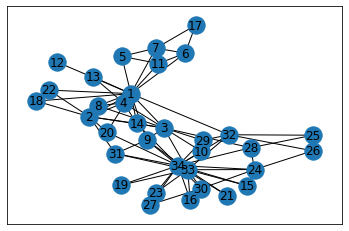

In [3]:
kn = nx.read_gml('graph.gml')
#nx.write_gml(kn, 'karate2.gml')
nx.draw_networkx(kn) #Draw the graph 

Сейчас мы можем вычислить PageRank, используя функцию, встроенную в NetworkX. Мы также изобразим вершины графа пропорционально тому, наскольку они важны в смысле величины PageRank'a.

  

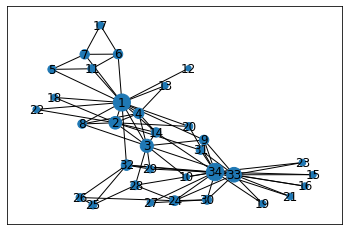

In [4]:
pr = nx.algorithms.link_analysis.pagerank(kn)
pr_vector = list(pr.values())
pr_vector = np.array(pr_vector) * 3000
nx.draw_networkx(kn, node_size=pr_vector, labels=None)

Самостоятельно проделайте это всё для страниц stanford.edu

## Граф для Стэнфорда

In [13]:
# df_edges = pd.read_csv('web-Stanford.txt', sep = '\t', comment='#', header = None)

In [ ]:
g = nx.read_weighted_edgelist('web-Stanford.txt', delimiter = '\t')

In [24]:
g_kk = nx.algorithms.core.k_core(g, k=70)

In [30]:
g_kkk = nx.algorithms.core.k_core(g, k=71)

In [33]:
g_pr = nx.algorithms.link_analysis.pagerank(g)
g_pr_vector = list(g_pr.values())
g_pr_vector = np.array(g_pr_vector) * 10000

In [32]:
g_

NameError: name 'g_pr_vector' is not defined

In [ ]:
nx.draw_networkx(g, node_size=g_pr_vector, labels=None)

Стэнфордский файл не читается(

# Задача 6*

Во многих задачах необходимо найти максимальный или минимальный собственный вектор и соответствующее ему значение. Для этого используют вариационный принцип.

- Тогда, если $А$ эрмитова матрица, отношение Релея определяется как
$$
R_{A}(x)=\frac{(A x, x)}{(x, x)}
$$
и максимальное собственное значение равно максимальному значению $R_{A}(x)$, аналогично для минимального собственного значения.
- Таким образом, мы можем использовать методы оптимизации для поиска этих экстремальных собственных значений.


А теперь приведём понятие, которое является обобщением собственных чисел


- Для динамических систем с матрицей $А$, спектр может много сообщить о поведении системы (например, о её устойчивости)
- Однако для не нормальных матриц, спектр может быть неустойчивым относительно малых возмущений матрицы
- Для измерения подобных возмущений было разработана концепция псевдоспектра.

Псевдоспектр.

Рассмотрим объединение всех возможных собственных значений для всевозможных возмущений матрицы $ A $
$$
\Lambda_{\epsilon}(A)=\left\{\lambda \in \mathbb{C}: \exists E, x \neq 0:(A+E) x=\lambda x, \quad\|E\|_{2} \leq \epsilon .\right\}
$$

Для малых $Е$ и нормальных $А$ это круги вокруг собственных значений. Для не нормальных матриц структура может сильно отличаться. Подробности можно найти тут: http://www.cs.ox.ac.uk/pseudospectra/

Определение. 

Матрица $A$ называется нормальной матрицей, если
$$
A A^{*}=A^{*} A
$$

Какие примеры нормальных матриц вы можете привести?
Примеры: эрмитовы матрицы, унитарные матрицы.

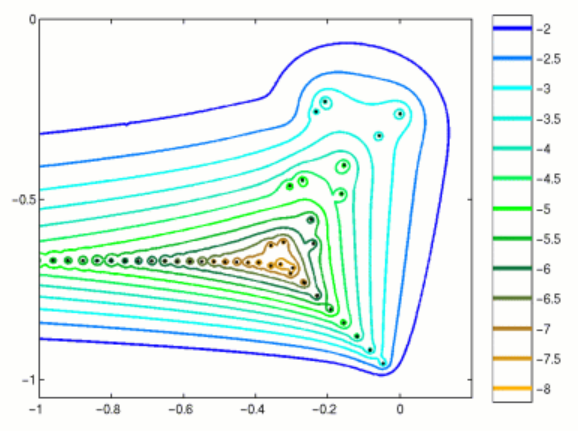

Докажите теорему Шура.

Теорема: Каждая матрица $A \in \mathbb{C}^{n \times n}$ может быть представлена в виде формы Шура $A = UTU^*$, где $U$ унитарная, а $T$ верхнетреугольная.






Докажите теорему о нормальных матрицах. 

Теорема: $A$ – нормальная матрица, тогда и только тогда, когда $A = U \Lambda U^*$, где $U$ унитарна и $\Lambda$ диагональна.

Это означает, что любая нормальная матрица – унитарно диагонализуема. То есть она может быть приведена к диагональному виду с помощью унитарной матрицы $U$. Другими словами, каждая нормальная матрица имеет ортогональный базис из собственных векторов. Ранее мы доказывали это другим способом.